# Vizualizace dat

V tomto úkolu si vyzkoušíme vizualizaci dat pomocí grafů. Naučíme se vykreslovat grafy pomocí knihovny Matplotlib. Projdeme si tvorbu celkem tří různých typů grafů a naučíme se tyto typy kombinovat v jednom grafu. Dále si ukážeme, jak v jednom obrázku vytvořit více různých grafů, případně jak najednou vytvořit více než jeden graf. Tvorbu grafů projdeme od zadávání dat až po grafickou stylizaci.

Jelikož by vizualizace nemohla existovat bez dat, představíme si dvě možnosti práce s daty - ruční zadávání do proměnných a importování dat ze souboru pomocí knihovny pandas.

Největší výhodou vizualizace dat pomocí Pythonu je využití proměnných jakožto hodnot v grafech a automatizace úkonů, které by člověk musel řešit ručně např. při tvorbě grafů v Excelu. Grafy i data lze navíc jednoduše a rychle upravit pouze změnou proměnných, parametrů atd. Dalším plusem je, že pro zpracování dat vůbec nemusíme opouštět prostředí, ve kterém programujeme.

Pro příkladové grafy použijeme data z [Veřejné databáze Českého statistického úřadu](https://vdb.czso.cz/vdbvo2/faces/cs/index.jsf?page=home), konkrétně [územní srovnání trestných činů za rok 2020](https://vdb.czso.cz/vdbvo2/faces/cs/index.jsf?page=vystup-objekt&z=T&f=TABULKA&katalog=31008&pvo=KRI06&str=v132&evo=v257_!_VUZEMI97-100mv_1&c=v3~8__RP2020) a [územní srovnání cen bytů v Kč za m2 za období 1. 1. 2017 - 31. 12. 2019](https://vdb.czso.cz/vdbvo2/faces/cs/index.jsf?page=vystup-objekt&z=T&f=TABULKA&katalog=31782&pvo=CEN13&c=v3~1__RP2017RK2019MP01MK12DP01DK31#w=), dále z [datového portálu města Brna](https://data.brno.cz/) použijeme [statistiku počtu pohybů letadel](https://infogram.com/pocet-pohybu-letadel-1ho16vk5yndx2nq) a [statistiku průměrné mzdy v Brně podle vzdělání](https://infogram.com/prumerna-mzda-vzdelani-1hnq41gz3ozk43z).

## 1 S čím budeme pracovat

### 1.1 Matplotlib

Matplotlib je knihovna pro Python vhodná pro vizualizaci dat. Umožňuje vytvářet grafy, uživatel si může vybrat z velkého množství různých typů. Největší výhodou této knihovny je možnost velmi jednoduše a rychle měnit hodnoty v grafech pomocí proměnných.

Více informací na [Matplotlib](https://matplotlib.org/) a [Matplotlib Tutorials](https://youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_).

### 1.2 pandas

pandas je knihovna pro Python sloužící k datové analýze. Využití této knihovny je široké, v tomto noteboku ji však použijeme pouze na importování dat ve formátu csv. 

Více informací na [pandas](https://pandas.pydata.org/).


## 2 Instalace

Instalaci potřebných knihoven provedeme přímo v tomto notebooku. Matplotlib a pandas nainstalujeme pouze pro tento konkrétní spuštěný notebook pomocí následující buňky (po každém zavření notebooku tuto buňku tedy budete muset spustit znovu). Pokud si chcete nainstalovat Matplotlib a pandas přímo do počítače, postupujte podle návodu v dokumentaci k těmto knihovnám.

Následující buňku pouze spusťte.

In [ ]:
#Instalace potřebných knihoven pro tento konkrétní Jupyter Notebook kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

## 3 Import knihoven a modulů

Než budeme moct začít s psaním programu, musíme importovat všechny knihovny a moduly, které budeme potřebovat. Patří mezi ně:

- matplotlib
- pandas

Spusťte následující buňku, knihovny se importují.

**Poznámka:** Po každém otevření notebooku je nutné všechen kód (tj. i importování) spustit znovu. Výsledky sice zůstanou zobrazeny, proměnné však v paměti nezůstávají.

In [1]:
import matplotlib.pyplot as plt #importuj knihovnu Matplotlib
import pandas as pd #importuj knihovnu pandas

Díky modulu `import as` nemusíme v programu psát zdlouhavý název `matplotlib.pyplot`, ale zkrátíme jej pouze na `plt`. V podstatě se jedná o vytvoření aliasu. Mohli bychom si vybrat i jinou zkratku, jde však o konvenci (to samé platí i o knihovně pandas, pro kterou užíváme zkratku `pd`). 

## 4 Koláčový graf

V této sekci budeme pracovat s knihovnou Matplotlib. Naším prvním úkolem bude vygenerovat jednoduchý koláčový graf. Využijeme základní funkce z [ukázkového grafu](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) a pár proměnných, díky kterým si budeme moct graf vizuálně upravit.

Pro tento graf použijeme data z Českého statistického úřadu, konkrétně územní srovnání trestných činů za rok 2020.


Nejprve deklarujeme proměnné `slices` a `labels`, které použijeme jako parametry k funkci generující koláčový graf. Obě tyto proměnné _musí_ být datového typu seznam.

Do proměnné `slices` uložíme celkový počet trestných činů, kdežto do proměnné `labels` název kraje, ve kterém se trestné činy odehrály. První prvek v seznamu `slices` odpovídá počtu trestných činů uskutečněných v hlavním městě Praze. 

In [2]:
slices = [38059, 18091, 7947, 8996, 4422, 14872, 
          7290, 5794, 4778, 4835, 16985, 8369, 5452, 19635] #celkový počet trestných činů
labels = ['Hlavní město Praha', 'Středočeský kraj', 'Jihočeský kraj',
          'Plzeňský kraj', 'Karlovarský kraj', 'Ústecký kraj',
          'Liberecký kraj', 'Královéhradecký kraj', 'Pardubický kraj',
          'Kraj Vysočina', 'Jihomoravský kraj', 'Olomoucký kraj',
          'Zlínský kraj', 'Moravskoslezský kraj'] #kraje

Nový graf vytvoříme pomocí posloupnosti několika funkcí.

Vždy nejprve zavoláme knihovnu Matplotlib aliasem, který jsme nastavili při importování knihoven (`plt`), poté vybereme specifickou funkci z této knihovny, jenž chceme použít. Pokud budeme pracovat s knihovnou Matplotlib, všechny příkazy budou mít formát: `plt.[funkce](parametr1, parametr2, ...)`, konkrétně např. `plt.figure(1)`.

Funkce `figure` vytvoří nový obrázek, do kterého se později vygeneruje graf. Parametr funkce můžeme buď nechat prázdný, nebo do něj vložit číslo, které bude tento obrázek odlišovat od ostatních.

Pomocí funkce `pie` vytvoříme samotný koláčový graf. Tato funkce vyžaduje alespoň jeden parametr - `slices`, což jsou hodnoty, které chceme v koláčovém grafu zobrazit. Tento parametr _musí_ vždy nést název `slices`. Pro úplnost využijeme i parametr `labels` (popisky). U tohoto parametru už přesně specifikujeme, jak se daná proměnná jmenuje (v našem případě je to stejně - `labels`, ale v dalších příkladech uvidíte, že lze proměnné pojmenovat i jinak).

Pokud použijeme funkce `figure` a `pie`, graf se sice zhotoví, ale neuvidíme jej. K tomu, aby se ukázal, potřebujeme použít funkci `show`.

**Poznámka:** Pokud budete s knihovnou Matplotlib pracovat v jiných prostředích než v Jupyter Notebooku, obrázek se vám ukáže v novém okně. Kdybyste si hotový graf chtěli uložit, použijte místo funkce `show` funkci `savefig` v následujícím formátu: `plt.savefig("[nazev_obrazku].[format]")`, konkrétně např. `plt.savefig("obrazek.png")`. Obrázek se uloží do složky, ve které se nachází váš kód.

Následující buňku pouze spusťte.

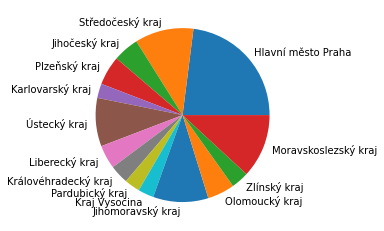

In [9]:
plt.figure(1) #vytvoř nový obrázkek
plt.pie(slices, labels=labels) #vytvoř nový koláčový graf s parametry slices a labels
plt.show(1) #vykresli obrázek

Takto vytvoříme základní koláčový graf. Můžeme ho dále upravovat, zejména po vizuální stránce.

- Seznam `colors` každé hodnotě přiřadí barvu.
- V seznamu `explode` můžeme některým hodnotám přiřadit číselnou hodnotu, o kterou se jednotlivé hodnoty vysunou z grafu.
- Díky parametru `autopct` zobrazíme procentuální zastoupení jednotlivých dílků bez toho, aniž bychom něco museli počítat.
- Funkce `title` přidá grafu nadpis.
- Pomocí funkce `tight_layout` upravíme výplň kolem grafů. Tato funkce pro nás bude důležitá zejména v sekci 8.

Následující buňku pouze spusťte. Prohlédněte si kód a výsledný graf.

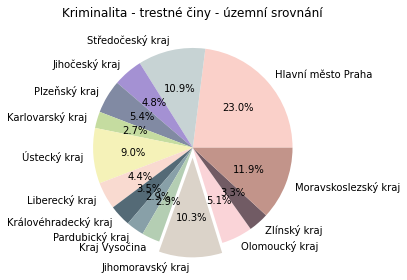

In [13]:
colors = ['#FAD0C9FF', '#C7D3D4FF', '#A491D3', '#818AA3', '#C5DCA0',
          '#F5F2B8', '#F9DAD0', '#546A76', '#88A0A8', '#B4CEB3',
          '#DBD3C9', '#FAD4D8', '#715B64', 
          '#C2948A'] #barvy
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0.1, 0, 0, 0] #odsazení 

plt.figure(2) #vytvoř nový obrázek

plt.pie(slices, labels=labels, colors=colors, 
        explode=explode, autopct='%1.1f%%') #vytvoř nový koláčový graf

plt.title('Kriminalita - trestné činy - územní srovnání') #nadpis
plt.tight_layout() #uprav výplň kolem grafů

plt.show(2) #vykresli obrázek

**Úkol 1:** Vytvořte vlastní koláčový graf. Použijte vlastní data nebo si vyberte jinou statistiku z Veřejné databáze Českého statistického úřadu. Začněte základním grafem a dále přidávejte parametry, které upraví vizuální stránku grafu. Použijte další funkce a parametry modifikující vzhled grafu, které jsme v tomto notebooku nepoužili. Naleznete je např. v [pyplot dokumentaci](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) a v [přehledu parametrů](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie) pro funkci `pie`.

In [ ]:
""" TO-DO """


## 5 Sloupcový graf

Dalším užitečným grafem je sloupcový graf. Postupovat budeme stejně jako při tvorbě koláčového grafu, některé funkce se ale budou úplně lišit či budou vyžadovat jiné parametry.

Pro tento typ grafu použijeme opět data z Veřejné databáze Českého statistického úřadu, konkrétně územní srovnání průměrných cen bytů v Kč za m2 za období 1. 1. 2017 - 31. 12. 2019.

V tomto grafu už budeme pracovat s osami x a y. Na ose x uvidíme jednotlivé kraje, na osu y zaneseme ceny bytů. Připravíme si pro to proměnné `region_x` a `crime_y`. 

Následující buňku pouze spusťte.

In [26]:
region_x = ['Hlavní město Praha', 'Středočeský kraj', 'Jihočeský kraj',
          'Plzeňský kraj', 'Karlovarský kraj', 'Ústecký kraj',
          'Liberecký kraj', 'Královéhradecký kraj', 'Pardubický kraj',
          'Kraj Vysočina', 'Jihomoravský kraj', 'Olomoucký kraj',
          'Zlínský kraj', 'Moravskoslezský kraj'] #kraje
cost_y = [62459, 28212, 19115, 25435, 14785, 9019, 20122, 
           22980, 24225, 21701, 36603, 21070, 22981, 17136] #cena

Podobně jako u koláčového grafu, i u sloupcového grafu použijeme funkce `figure` a `show`. Na rozdíl od předchozího typu grafu ale budeme pracovat s funkcí `bar` pro sloupcový graf místo funkce `pie` pro koláčový graf.

Následující buňku pouze spusťte.

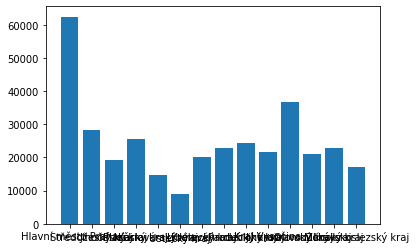

In [27]:
plt.figure(3) #vytvoř nový obrázek
plt.bar(region_x, cost_y) #vytvoř nový sloupcový graf
plt.show(3) #vykresli obrázek

Stejně jako jsme v předchozí sekci upravili výsledný koláčový graf, můžeme změnit i sloupcový graf v této sekci.

Hned při prvním pohledu na graf výše si všimneme, že popisky jednotlivých hodnot jsou tak dlouhé, že se překrývají a nelze je přečíst. Nejjednodušším řešením pro tento problém je popisky zobrazit vertikálně namísto horizontálně. K tomu slouží funkce `xticks`, jejíž parametr `rotation` nastavíme na `vertical`.

Abychom věděli, co jednotlivé hodnoty na y-ové a x-ové ose znamenají, použijeme funkce `xlabel` a `ylabel` k zobrazení popisků.

Dále použijeme funkce, které již známe z příkladu s koláčovým grafem.

Následující buňku pouze spustťe.

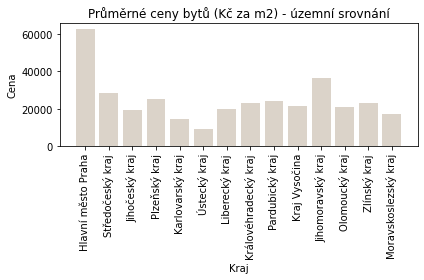

In [28]:
plt.figure(4) #vytvoř nový obrázek

plt.bar(region_x, cost_y, color='#DBD3C9') #vytvoř nový sloupcový graf

plt.title('Průměrné ceny bytů (Kč za m2) - územní srovnání') #nadpis
plt.xlabel('Kraj') #popisky x-ové osy
plt.xticks(rotation='vertical') #otoč x-ových popisky
plt.ylabel('Cena') #popisky y-ové osy

plt.tight_layout() #uprav výplň kolem grafů
plt.show(4) #vykresli obrázek

**Úkol 2:** Vytvořte vlastní sloupcový graf. Použijte vlastní data nebo si vyberte jinou statistiku z Veřejné databáze Českého statistického úřadu. Začněte základním grafem a dále přidávejte parametry, které upraví vizuální stránku grafu. Vyzkoušejte funkci `xticks` s jinou než vertikální rotací (např. zešikmenou). Použijte další funkce a parametry modifikující vzhled grafu, které jsme v tomto notebooku nepoužili. Naleznete je např. v [pyplot dokumentaci](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) a v [přehledu parametrů](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar) pro funkci `bar`.

In [ ]:
""" TO-DO """


## 6 Spojnicový graf

Třetí graf, který si zkusíme vytvořit, je spojnicový graf. V této sekci si navíc představíme, jak importovat data ze souboru pomocí knihovny pandas. Nejprve si stáhněte [tuto statistiku](https://infogram.com/pocet-pohybu-letadel-1ho16vk5yndx2nq) ve formátu csv a uložte ji na stejné místo, kde se nachází i tento notebook, pod názvem `letadla.csv`.

Nejprve se podíváme, jak naše data vypadají. Deklarujeme novou proměnnou `data`, do které uložíme celý csv soubor `letadla.csv`. To uděláme tak, že zavoláme knihovnu pandas aliasem `pd`, který jsme nastavili při importování knihoven. Dále použijeme funkci `read_csv`, která načte celý csv soubor. Do parametru této funkce zadáme cestu k souboru, který chceme otevřít. Jelikož jsme si soubor uložili do stejné lokace, v níž se nachází i tento notebook, napíšeme pouze celý název souboru, tj, `letadla.csv`. 

Následující buňku pouze spusťte.

In [29]:
data = pd.read_csv('letadla.csv') #načti data ze souboru

Celou csv tabulku máme nyní načtenou v proměnné `data`. Spusťte následující buňku a prohlédněte si obsah proměnné.

**Poznámka:** Tento způsob vypisování proměnných funguje _pouze_ v Jupyter Notebooku. Při práci v jiných prostředích použijte standardně `print(data)`.

In [30]:
data #vypiš proměnnou data

,Rok,Unnamed: 1
0,2006,20105
1,2007,22893
2,2008,29303
3,2009,30513
4,2010,25027
5,2011,26837
6,2012,29885
7,2013,27805
8,2014,32216
9,2015,38264


Jak si můžeme všimnout, druhý sloupeček je špatně pojmenovaný. Aby se nám s proměnnou lépe pracovalo, přejmenujeme sloupeček _Unnamed: 1_ na _Letadla_ pomocí funkce `rename`.

Následující buňku pouze spusťte.

In [31]:
data = data.rename(columns={'Rok': 'Rok', 'Unnamed: 1': 'Letadla'}) #přejmenuj sloupec 'Unnamed: 1' na 'Letadla'

Následující buňku pouze spusťte a přesvědčte se, že k přejmenování skutečně došlo.

In [10]:
data #vypiš proměnnou

,Rok,Letadla
0,2006,20105
1,2007,22893
2,2008,29303
3,2009,30513
4,2010,25027
5,2011,26837
6,2012,29885
7,2013,27805
8,2014,32216
9,2015,38264


Nyní můžeme vykreslit spojnicový graf. Ke sloupcům v proměnné `data` budeme přistupovat podobně, jako se v Pythonu přistupuje k hodnotám v datovém typu slovník. Hodnoty ze sloupce `Rok` uložíme do proměnné `year_x` a hodnoty ze sloupce `Letadla` do proměnné `planes_y`.

Následující buňku pouze spusťte.

In [5]:
year_x = data['Rok'] #rok
planes_y = data['Letadla'] #počet pohybů letadel

**Poznámka a mini úkol:** Je ale důležité uvědomit si, že v případě proměnné `data` se o slovník nejedná. Zjistěte, jakého datového typu je proměnná `data`.

In [ ]:
""" TO-DO """


Nyní už jsme schopni vykreslit graf pomocí knihovny Matplotlib. Funkce, kterou použijeme pro čárový graf, se nazývá `plot`.

Následující buňku pouze spusťte.

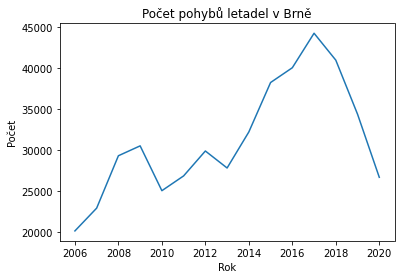

In [36]:
plt.figure(5) #vytvoř nový obrázek

plt.plot(year_x, planes_y) #vytvoř nový čárový graf

plt.title('Počet pohybů letadel v Brně') #nadpis
plt.xlabel('Rok') #popisky x-ové osy
plt.ylabel('Počet') #popisky y-ové osy

plt.show(5) #vykresli obrázek

**Úkol 3:** Vytvořte vlastní čárový graf. Použijte vlastní data nebo si vyberte jinou statistiku z Veřejné databáze Českého statistického úřadu či statistik města Brna. Začněte základním grafem a dále přidávejte parametry, které upraví vizuální stránku grafu. Opět je naleznete v dokumentaci pro příslušný typ grafu.

In [ ]:
""" TO-DO """


## 7 Více dat v jednom grafu

Knihovny pro vizualizaci dat umožňují kombinovat více datových sad najednou. V jednom obrázku tak lze vykreslit např. několik čar či sloupců s jinými hodnotami. Knihovny ale práci s daty neomezují pouze na stejné typy grafů. Můžeme implementovat i kombinace, např. sloupcový graf s čárovým. V této sekci si vyzkoušíme, jak se tyto grafy tvoří.

Nejprve si stáhněte statistiku [průměrných mezd v Brně podle vzdělání](https://infogram.com/prumerna-mzda-vzdelani-1hnq41gz3ozk43z) ve formátu csv ze statistik města Brna. Soubor pojmenujte `mzdy.csv` a opět je uložte na stejné místo, kde máte tento notebook.

Naším prvním krokem opět bude import dat. Následující buňky pouze spusťte.

In [11]:
data2 = pd.read_csv('mzdy.csv') #načti data ze souboru

In [12]:
data2 #vypiš proměnnou data2

,Rok,Základní,SŠ bez maturity,SŠ s maturitou,Vyšší odborné vzdělání,VŠ I. stupně,VŠ II. stupně,Postgraduální
0,2009,16818,18158,22374,21633,24316,29327,31505
1,2010,15977,17816,22798,22546,27601,30864,32647
2,2011,17457,18129,23451,22094,27790,31918,32856
3,2012,17386,18713,23962,22039,27594,31679,34325
4,2013,16172,18484,23395,23760,27852,31984,34509
5,2014,15998,17928,21780,22254,26187,29703,33302
6,2015,17739,19663,24025,24494,28441,32029,39745
7,2016,20243,21170,26487,26825,30722,34352,41495
8,2017,22418,22850,28940,27849,33516,37978,42046
9,2018,22200,25811,31468,30928,36052,40357,47468


Struktura dat je velmi podobná té, se kterou jsme pracovali v minulé sekci. Oproti statistice pohybů letadel máme ovšem více dat, která potřebujeme znázornit na y-ové ose. Pro následující příklad použijeme pouze první tři, tj. `Základní` vzdělání, `SŠ bez maturity` a `SŠ s maturitou`. X-ová osa zůstane stejná, na ní znázorníme roky.

Kód je velmi jednoduchý, vše zůstává stejné jako v příkladech, se kterými jsme se setkali doposud, až na to, že použijeme příkaz `plt.plot()` pro vytvoření nového grafu třikrát namísto jednou.

V této sekci také poprvé představujeme funkci `legend` (legenda), s parametrem `loc` nastaveným na `best`. Tento příkaz nám říká, že chceme v grafu zobrazit legendu na místě, kam se nejlépe hodí (tj. na pozici, kde bude dobře čitelná a nebude se překrývat s čárami). Matplotlib tuto pozici vyhodnotí za nás.

Prohlédněte si následující kód a buňku pouze spusťte.

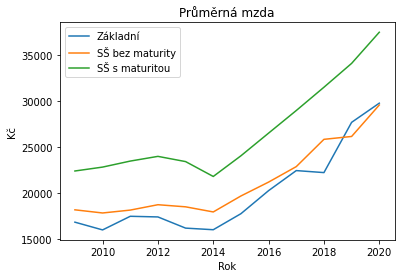

In [13]:
year = data2['Rok'] #rok
zak = data2['Základní'] #průměrná mzda se základním vzděláním
ssbm = data2['SŠ bez maturity'] #průměrná mzda se SŠ bez maturity
ssm = data2['SŠ s maturitou'] #průměrná mzda se SŠ s maturitou

plt.figure(6) #vytvoř nový obrázek

plt.xlabel('Rok') #popisky x-ové osy
plt.ylabel('Kč') #popisky y-ové osy
plt.title('Průměrná mzda') #nadpis

plt.plot(year, zak, label='Základní') #vytvoř nový čárový graf
plt.plot(year, ssbm, label='SŠ bez maturity') #vytvoř nový čárový graf
plt.plot(year, ssm, label='SŠ s maturitou') #vytvoř nový čárový graf

plt.legend(loc='best') #zobraz legendu na nejvhodnějším místě

plt.show(6) #vykresli obrázek

**Úkol 4:** Vytvořte vlastní graf, ve kterém použijete více dat. Neomezujte se pouze na čárový graf, vykreslete sloupcový graf s vícero sloupci u jedné x-ové hodnoty, popř. zkombinujte sloupcový graf s čárovým. Použijte vlastní data nebo si vyberte jinou statistiku z Veřejné databáze Českého statistického úřadu či statistik města Brna. Začněte základními grafy a dále přidávejte parametry, které upraví vizuální stránku grafů. Opět je naleznete v dokumentaci pro příslušné typy grafů.

In [ ]:
""" TO-DO """


## 8 Více různých grafů v jednom obrázku

V minulé sekci jsme se naučili vykreslit vícero dat v jednom grafu. Co kdybychom ale chtěli porovnat dva různé grafy v jednom obrázku nebo najednou vytvořit dva různé obrázky? I to Matplotlib umí díky funkci `subplots`a třídě `axes`. 

Doposud jsme vždy vytvořili jeden graf, který jsme vykreslili na jednom obrázku. K tomu nám posloužil objekt `Plot()`, který v sobě obsahoval stav všech parametrů, které jsme upravili v daném grafu a obrázku. Takto explicitně jsme tento objekt však netvořili, importovali jsme si jej rovnou z knihovny Matplotlib jako `plt`. Kromě parametrů a funkcí, se kterými jsme se setkali doposud, tento objekt obsahuje informace o tom, s jakým obrázkem a také s jakými osami v rámci obrázku pracujeme. Díky tomu se tak budeme moci rozhodnout, do kterého obrázku vykreslit jaký graf, a na jakou osu (tj. kam) graf v rámci obrázku umístit.

Kód v této sekci se bude mírně lišit od těch, které jsme psali v předchozích lekcích, a bude připomínat objektově-orientovaný přístup programování. Postup si nejprve vysvětlíme na obrázku, který bude obsahovat jeden graf, až v dalším příkladu si ukážeme, jak vykreslit grafy dva.

Začneme stejně jako v předchozích sekcích deklarováním proměnných, do kterých si uložíme naše data. V této sekci budeme používat stejnou sadu jako v lekci předchozí. První čtyři řádky kódu tedy budou stejné.

Poté ale místo vytvoření obrázku příkazem `plt.figure()` vytvoříme objekt `plt.subplots()`, který obsahuje obrázek `fig` a osy `ax`. Máme tedy jeden obrázek a jednu osu, přičemž můžeme specifikovat, jak má osa vypadat (kolik má mít řádků a sloupců). V tomto prvním příkladě jsme nechali funkci `subplots` prázdnou, automaticky tedy pracujeme s osou, která obsahuje jen jeden řádek a jeden sloupec.

Pamatujte, že v tomto přístupu pracujeme s osami. Nebudeme tedy pro vytvoření grafu volat objekt `plt`, ale přímo osu `ax`, do které chceme graf vykreslit. Příkazem `ax.plot(year, zak, label='Základní')` tedy říkáme, na osu `ax` vykresli čárový graf průměrné mzdy po ukončení pouze základního vzdělání.

Pokud budeme chtít popsat x-ovou osu našeho grafu (**pozor** nepleťte si x-ovu a y-ovou osu grafu s osami `ax`), musíme použít funkci `set_xlabel` namísto `xlabel`. 

Všechno ostatní zůstane jako v předchozích příkladech. Funkce `tight_layout` a `show` používáme pouze pro objekt `plt`, proto v nich neměníme `plt` za `ax`.


**Poznámka:** Pokud vám toto vysvětlení nepřišlo dostačující, můžete se podívat na [video](https://youtu.be/XFZRVnP-MTU) s ukázkami, ze kterého byl tento postup převzat.

Následující buňku pouze spusťte.

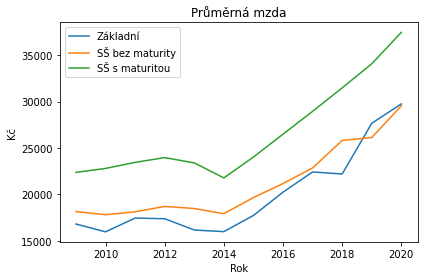

In [39]:
year = data2['Rok'] #rok
zak = data2['Základní'] #průměrná mzda se základním vzděláním
ssbm = data2['SŠ bez maturity'] #průměrná mzda se SŠ bez maturity
ssm = data2['SŠ s maturitou'] #průměrná mzda se SŠ s maturitou

fig, ax = plt.subplots() #vytvoř objekt pro vícero grafů

ax.plot(year, zak, label='Základní') #vytvoř nový čárový graf
ax.plot(year, ssbm, label='SŠ bez maturity') #vytvoř nový čárový graf
ax.plot(year, ssm, label='SŠ s maturitou') #vytvoř nový čárový graf

ax.set_xlabel('Rok') #popisky x-ové osy
ax.set_ylabel('Kč') #popisky y-ové osy
ax.set_title('Průměrná mzda') #nadpis

ax.legend(loc='best') #legenda

plt.tight_layout() #uprav výplň kolem grafu

plt.show() #vykresli obrázek

Nyní můžeme zvýšit počet řádků nebo sloupečků a vytvořit tak díky tomu více os `ax`, na které budeme schopni vykreslit grafy. Uděláme to tak, že funkci `subplots` předáme parametry `nrows` a `ncols` specifikující počet řádků a počet sloupců. V následujícím příkladu vytvoříme dva grafy vedle sebe, počet sloupců `ncols` tedy zvýšíme na 2. Kvůli tomu musíme zvýšit i počet os `ax`, jelikož budeme mít první `ax1` vlevo a druhou `ax2` vpravo.

Dále je kód úplně stejný jako v předchozím příkladu, liší se pouze v označení os `ax` podle toho, do jaké chceme co vykreslit. Do osy `ax1` vykreslíme čárový graf průměrné mzdy po ukončení pouze základního vzdělání s popisky, do osy `ax2` čárové grafy průměrných mezd po ukončení SŠ s maturitou a bez maturity, popisky grafu a legendu.

V tomto případě je navíc důležitá funkce `tight_layout`. Vyzkoušejte si, jak výsledný obrázek bude vypadat bez ní.

Následující buňku pouze spusťte.

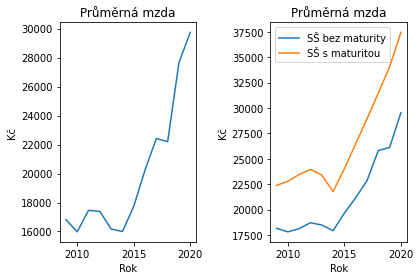

In [40]:
year = data2['Rok'] #rok
zak = data2['Základní'] #průměrná mzda se základním vzděláním
ssbm = data2['SŠ bez maturity'] #průměrná mzda se SŠ bez maturity
ssm = data2['SŠ s maturitou'] #průměrná mzda se SŠ s maturitou

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) #vytvoř objekt pro dva grafy vedle sebe

ax1.plot(year, zak, label='Základní') #vytvoř nový čárový graf
ax1.set_xlabel('Rok') #popisky x-ové osy
ax1.set_ylabel('Kč') #popisky y-ové osy
ax1.set_title('Průměrná mzda') #nadpis

ax2.plot(year, ssbm, label='SŠ bez maturity') #vytvoř nový čárový graf
ax2.plot(year, ssm, label='SŠ s maturitou') #vytvoř nový čárový graf
ax2.set_xlabel('Rok') #popisky x-ové osy
ax2.set_ylabel('Kč') #popisky y-ové osy
ax2.set_title('Průměrná mzda') #nadpis
ax2.legend(loc='best') #legenda

plt.tight_layout() #uprav výplň kolem grafů

plt.show() #vykresli obrázek

Pokud kód trochu upravíme, můžeme najednou vytořit dva samostatné obrázky. Stačí nahradit `fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)` za řádek, který jsme použili v prvním příkladu této sekce (`fig, ax = plt.subplots()`).

V tuto chvíli je velmi důležité od sebe páry obrázků s osami odlišit. Jak obrázek `fig`, tak osa `ax` musí být očíslovány.

**Poznámka:** V Jupyter Notebooku rozdíl mezi tímto a předchozím příkladem nebude tak patrný, v jiných prostředích by se vám však po spuštění následujícího kódu otevřela dvě okna s různými obrázky namísto jednoho, jako by tomu bylo v předchozím případě.

Následující buňku pouze spusťte.

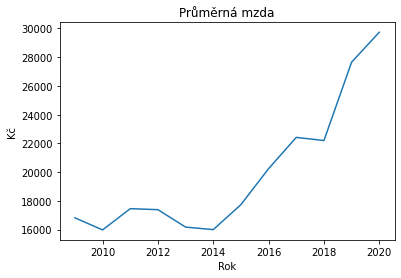

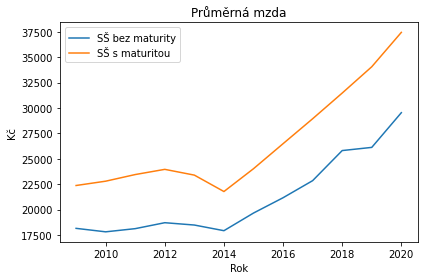

In [41]:
year = data2['Rok'] #rok
zak = data2['Základní'] #průměrná mzda se základním vzděláním
ssbm = data2['SŠ bez maturity'] #průměrná mzda se SŠ bez maturity
ssm = data2['SŠ s maturitou'] #průměrná mzda se SŠ s maturitou

fig1, ax1 = plt.subplots() #vytvoř první obrázek
fig2, ax2 = plt.subplots() #vytvoř druhý obrázek

ax1.plot(year, zak, label='Základní') #vytvoř nový čárový graf
ax1.set_xlabel('Rok') #popisky x-ové osy
ax1.set_ylabel('Kč') #popisky y-ové osy
ax1.set_title('Průměrná mzda') #nadpis

ax2.plot(year, ssbm, label='SŠ bez maturity') #vytvoř nový čárový graf
ax2.plot(year, ssm, label='SŠ s maturitou') #vytvoř nový čárový graf
ax2.set_xlabel('Rok') #popisky x-ové osy
ax2.set_ylabel('Kč') #popisky y-ové osy
ax2.set_title('Průměrná mzda') #nadpis
ax2.legend(loc='best') #legenda

plt.tight_layout() #uprav výplň kolem grafů

plt.show() #vykresli obrázek

**Úkol 5:** Vytvořte vlastní obrázek, ve kterém vykreslíte dva a více grafů. Použijte nová data nebo si zkopírujte již hotové grafy z předchozích cvičení.

In [ ]:
""" TO-DO """


**Úkol 6:** V jednom bloku kódu vytvořte dva a více vlastních obrázků, ve kterých vykreslíte různé grafy. Použijte nová data nebo si zkopírujte již hotové grafy z předchozích cvičení.

In [ ]:
""" TO-DO """